# Análise exploratória de dados

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

palette = {0: "lightblue", 1: "blue"}

## 1. Leitura do conjunto de dados

In [12]:
df = pd.read_csv('../data/raw/data.csv')
df.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

## 2. Descrição dos dados

O conjunto de dados do Titanic é um dos datasets mais famosos no campo do aprendizado de máquina. Este dataset contém informações demográficas e de viagem dos passageiros que estavam a bordo do RMS Titanic, que naufragou durante sua viagem inaugural em 1912 após colidir com um iceberg.

## 2.1. Dicionário de dados

In [13]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,survived,"Indica se o passageiro sobreviveu (0 = Não, 1 ...",quantitativa,discreta
1,pclass,"Classe do bilhete (1 = 1ª classe, 2 = 2ª class...",qualitativa,ordinal
2,sex,Sexo do passageiro,qualitativa,nominal
3,age,Idade do passageiro,quantitativa,contínua
4,sibsp,Número de irmãos/cônjuges a bordo,quantitativa,discreta
5,parch,Número de pais/filhos a bordo,quantitativa,discreta
6,fare,Tarifa do passageiro,quantitativa,contínua
7,embarked,Porto de embarque (C = Cherbourg; Q = Queensto...,qualitativa,nominal
8,class,"Classe (First, Second, Third)",qualitativa,nominal


- São 8 variáreis, com 3 qualitativas nominal e 2 quantitativas contínuas

## 3. Perguntas de partida e hipóteses

- **Pergunta 1:** Quais são as taxas de sobrevivência por classe de bilhete?

    **Hipótese 1:** Passageiros da primeira classe têm uma maior taxa de sobrevivência.

- **Pergunta 2:** Existe uma correlação entre idade e sobrevivência?

    **Hipótese 2:** Passageiros mais jovens têm uma maior taxa de sobrevivência.

- **Pergunta 3:** Passageiros de uma certa faixa etária têm maior chance de sobrevivência?

    **Hipótese 3:** Crianças têm uma maior chance de sobrevivência.

- **Pergunta 4:** A quantidade de familiares a bordo influencia na sobrevivência?

    **Hipótese 4:** Passageiros com menos familiares a bordo têm uma maior chance de sobrevivência.

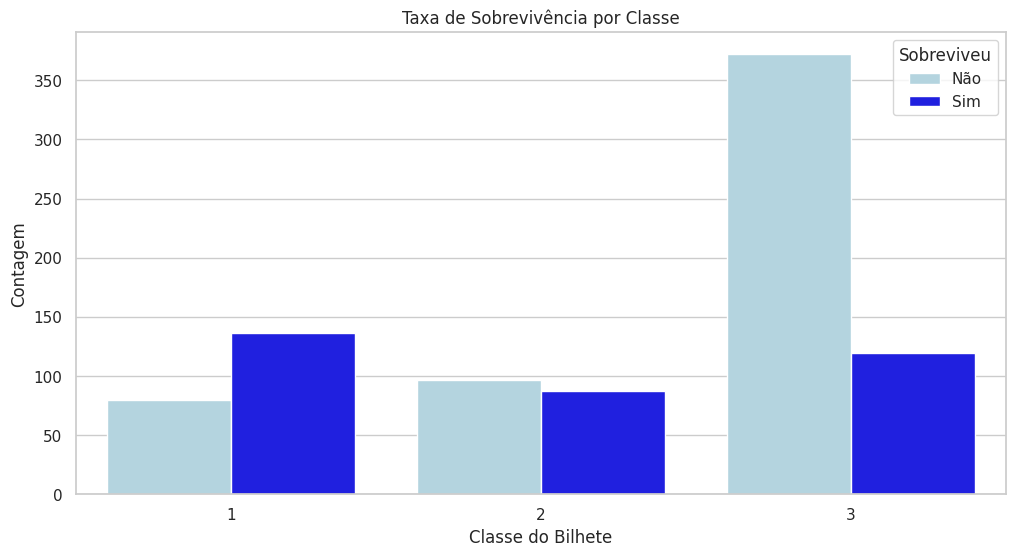

In [9]:
# Taxa de sobrevivência por classe do bilhete

plt.figure(figsize=(12, 6))
sns.countplot(x='pclass', hue='survived', data=df, palette=palette)
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe do Bilhete')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
plt.show()

- A análise indica que a classe do bilhete teve um impacto significativo na probabilidade de sobrevivência.
- Passageiros da primeira classe tinham maiores chances de sobreviver em comparação com os da segunda e terceira classes.
- Passageiros da terceira classe tinham as menores chances de sobrevivência.

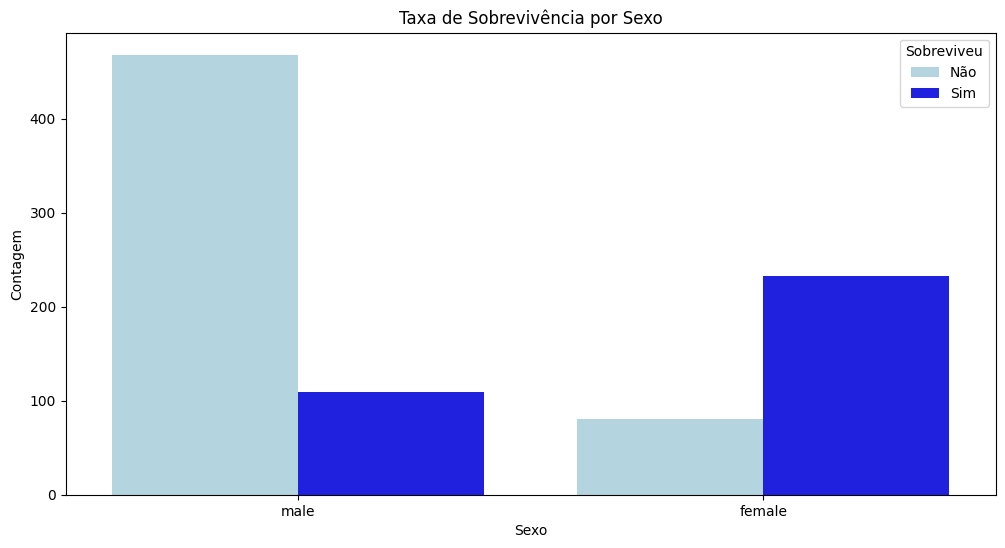

In [88]:
# Distribuição da Sobrevivência por Sexo

plt.figure(figsize=(12, 6))
sns.countplot(x='sex', hue='survived', data=df, palette=palette)
plt.title('Taxa de Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
plt.show()

- A análise indica que o sexo teve um impacto significativo na probabilidade de sobrevivência.
- Homens tinham menores chances de sobreviver em comparação com as mulheres.
- Mulheres tinham maiores chances de sobrevivência, possivelmente devido às normas sociais e procedimentos de resgate que priorizavam mulheres e criança

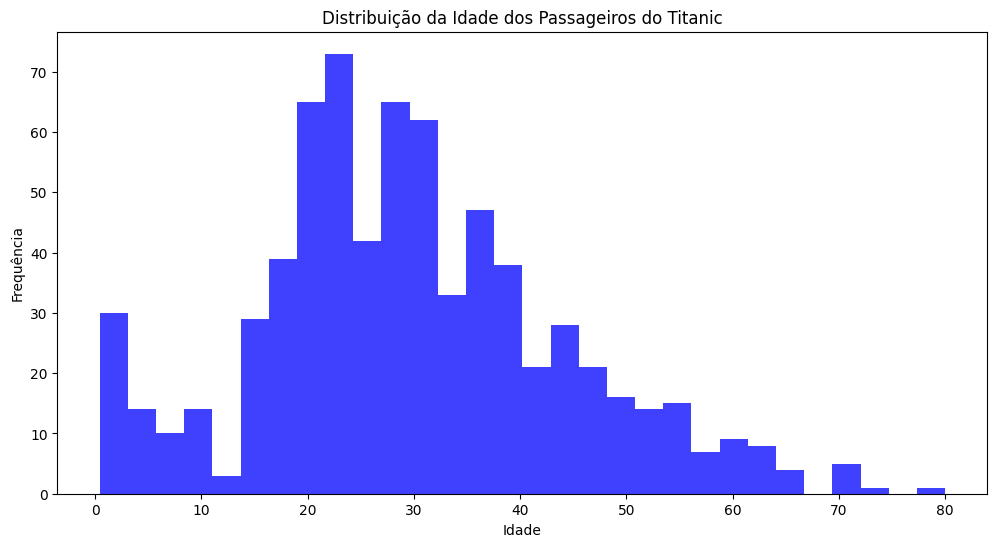

In [91]:
# Sobrevivência por Idade

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=30, kde=False, color='blue', edgecolor=None)
plt.title('Distribuição da Idade dos Passageiros do Titanic')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

- A distribuição é bastante concentrada na faixa etária jovem adulta.
- Isso pode indicar que a maioria dos passageiros do Titanic eram adultos jovens, possivelmente viajando por motivos de trabalho ou imigração.
- A menor presença de passageiros idosos e muito jovens pode refletir os padrões de viagem da época, onde pessoas mais velhas ou famílias com crianças pequenas poderiam ser menos propensas a realizar viagens longas.

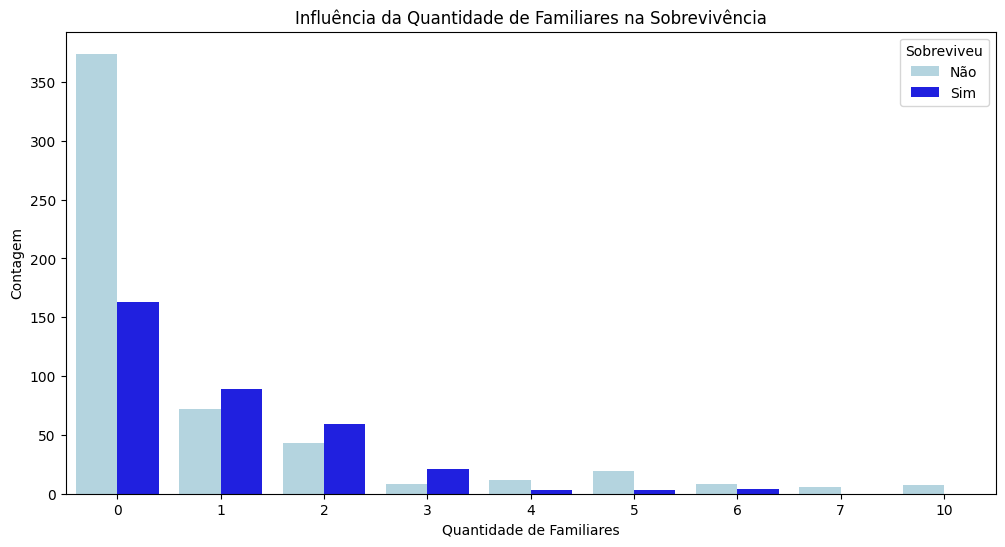

In [92]:
# Analisar a influência da quantidade de familiares a bordo na sobrevivência

df['family_size'] = df['sibsp'] + df['parch']
plt.figure(figsize=(12, 6))
sns.countplot(x='family_size', hue='survived', data=df, palette=palette)
plt.title('Influência da Quantidade de Familiares na Sobrevivência')
plt.xlabel('Quantidade de Familiares')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
plt.show()

- Passageiros sem familiares a bordo tinham menos chances de sobreviver, possivelmente devido à falta de suporte e assistência durante a evacuação.
- Passageiros com um pequeno número de familiares (1 a 3) parecem ter tido uma vantagem em termos de sobrevivência. Isso pode ser devido ao apoio mútuo e à coordenação durante a evacuação.
- Passageiros com um grande número de familiares (4 ou mais) enfrentaram mais dificuldades, possivelmente devido à complexidade de gerenciar um grupo grande durante uma situação de emergência.

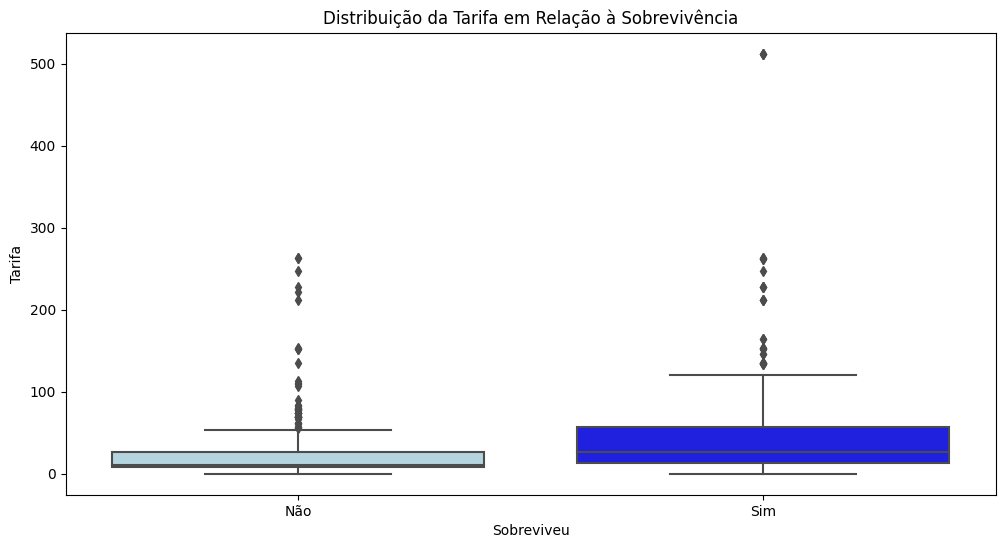

In [96]:
# Relação entre Tarifa e Sobrevivência

plt.figure(figsize=(12, 6))
sns.boxplot(x='survived', y='fare', data=df, palette=palette)
plt.title('Distribuição da Tarifa em Relação à Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Tarifa')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

- Os passageiros que pagaram tarifas mais altas tinham maiores chances de sobreviver.
- Isso sugere uma correlação entre a tarifa paga e a probabilidade de sobrevivência, possivelmente devido à relação com a classe de serviço (passageiros de primeira classe, que pagaram mais, tinham melhores chances de sobrevivência).
- Passageiros que pagaram tarifas baixas (provavelmente em classes inferiores) tinham menos chances de sobrevivência.

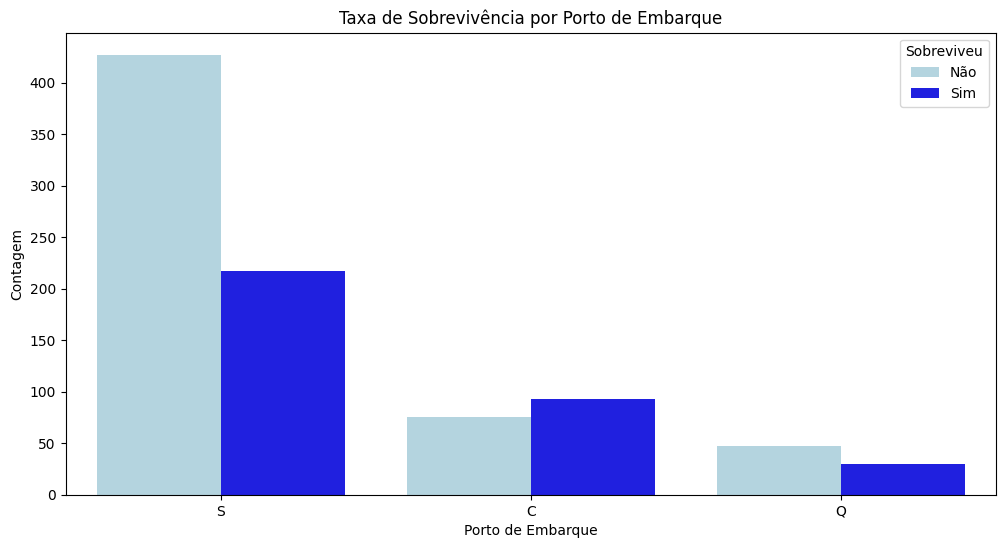

In [97]:
# Relação entre Porto de Embarque e Sobrevivência

plt.figure(figsize=(12, 6))
sns.countplot(x='embarked', hue='survived', data=df, palette=palette)
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
plt.show()

- A taxa de sobrevivência parece variar conforme o porto de embarque.
- Passageiros que embarcaram em Cherbourg tinham uma chance relativamente maior de sobreviver em comparação com os de Southampton e Queenstown.
- Southampton, sendo o porto com o maior número de passageiros, também tem o maior número de não sobreviventes, possivelmente refletindo a distribuição geral da população no navio.
- Queenstown, com o menor número de passageiros, tem menos dados, mas ainda mostra uma maior proporção de não sobreviventes.

## 4. Insights 

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

- Passageiros da primeira classe tinham maiores chances de sobrevivência em comparação com os da segunda e terceira classes;
- Mulheres tinham maiores chances de sobrevivência do que homens;
- A maioria dos passageiros estava na faixa etária dos 20 aos 40 anos, com menos crianças e idosos a bordo;
- Passageiros que estavam sozinhos ou com um grande número de familiares tinham menores chances de sobrevivência, enquanto aqueles com 1 a 3 familiares tinham melhores chances;
- Passageiros que pagaram tarifas mais altas tinham maiores chances de sobrevivência;
- Passageiros que embarcaram em Cherbourg tinham melhores chances de sobrevivência comparados aos que embarcaram em Southampton e Queenstown;
- A tarifa paga é um indicador significativo da probabilidade de sobrevivência, com tarifas mais altas associadas a maiores chances de sobrevivência;
- O número de familiares a bordo influenciou as chances de sobrevivência, com suporte emocional e físico sendo um fator positivo para quem tinha um pequeno número de familiares;
- Passageiros de primeira classe, mulheres e aqueles que pagaram tarifas mais altas foram priorizados durante o resgate, refletindo as normas sociais e desigualdades da época.
